# About the chronicle2050 dataset

- CODE + DATASET: [chronicle205](https://github.com/regevson/chronicle2050/tree/master/dataset)
- PAPER: [Future Timelines: Extraction and Visualization of Future-Related](https://dl.acm.org/doi/10.1145/3616855.3635693)
    - 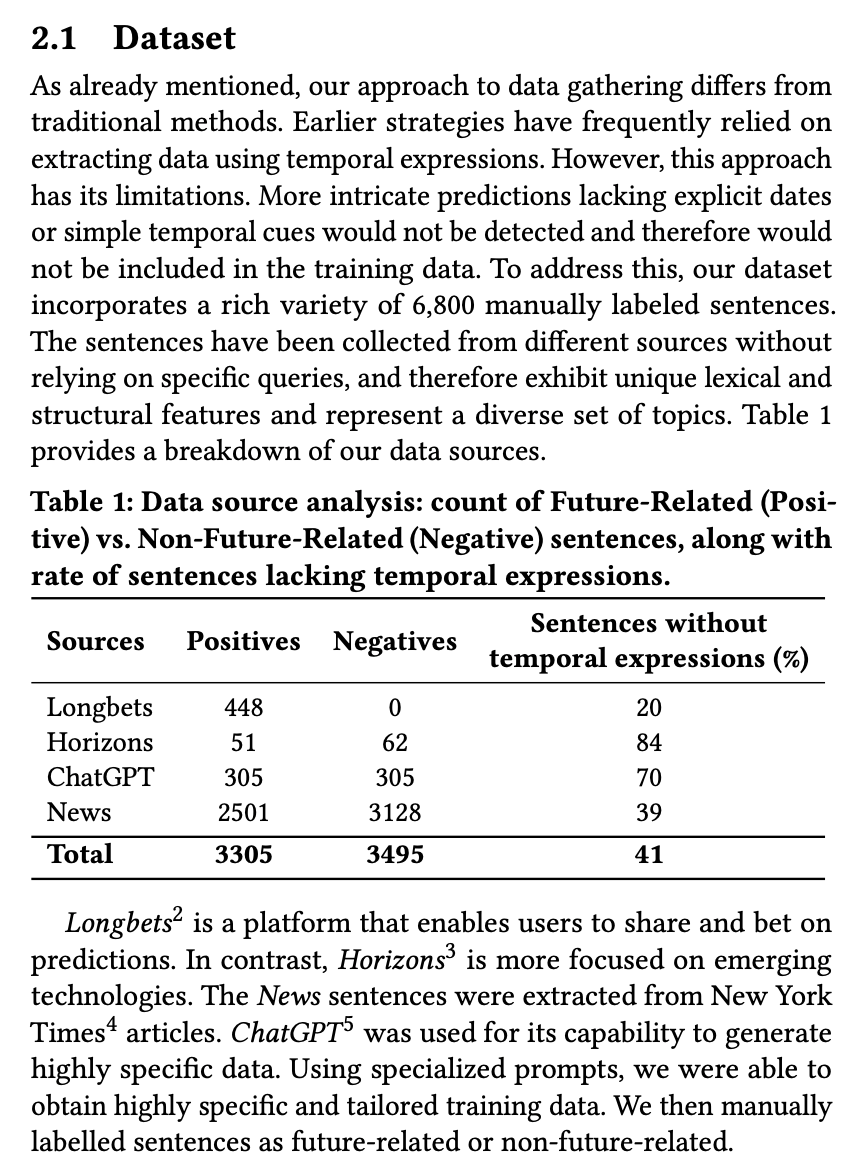

In [1]:
import os
import sys

import pandas as pd

notebook_dir = os.getcwd()

sys.path.append(os.path.join(notebook_dir, '../'))

from data_processing import DataProcessing

In [2]:
# pd.set_option('max_colwidth', 800)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_columns', 40)
# pd.set_option('display.max_rows', None)

In [3]:
base_data_path = os.path.join(notebook_dir, '../data')
data_path = os.path.join(base_data_path, 'chronicle2050/data.csv')
df = DataProcessing.load_from_file(data_path, 'csv', sep=',')

In [4]:
df.head(7)

,index,sentence,label
0,0,"By January 1st, 2037, Tesla will have been the...",1
1,1,An annual average temperature anomaly value ab...,1
2,2,Private Nonfarm business productivity growth w...,1
3,3,No Republican will be President of the USA bef...,1
4,4,The market capitalization of Berkshire Hathawa...,1
5,5,A bitcoin will be worth less than $1000US by t...,1
6,6,By 2035 there will be at least 10 people livin...,1


In [5]:
df.tail(7)

,index,sentence,label
6395,2538,Fulcrum Capital LLC grew its position in share...,0
6396,2539,"Ev Dynamics (Holdings) Limited (the ""Company"",...",0
6397,2540,Many major technology players are [TeleNav Inc...,0
6398,2541,"WaterIQ Technologies, the leader in next-gener...",0
6399,2542,The Business Research Company's 'Clean Coal Te...,0
6400,2543,'Prophecy Market Insights offers a 20% discoun...,0
6401,2544,The Northern Virginia Technology Council (NVTC...,0


# Load our model labels to compare with true labels

In [6]:
save_chronicle2050_results_path = os.path.join(base_data_path, 'inference/chronicle2050_results')

load_chronicle2050_results_path = os.path.join(base_data_path, save_chronicle2050_results_path, 'chronicle2050_results-v1.csv')
load_chronicle2050_results_df = DataProcessing.load_from_file(load_chronicle2050_results_path, sep=',')
load_chronicle2050_results_df

,index,sentence,label,sentence embedding,logistic_regression,random_forest_classifier,gradient_boosting_classifier,perceptron,ridge_classifier,sgd_classifier,decision_tree_classifier
0,0,"By January 1st, 2037, Tesla will have been the...",1,[-4.69374172e-02 1.84888348e-01 -1.93335768e-...,1,1,1,1,1,1,1
1,1,An annual average temperature anomaly value ab...,1,[-8.03273544e-02 1.84596255e-01 9.70091950e-...,0,1,1,0,0,0,1
2,2,Private Nonfarm business productivity growth w...,1,[-9.73114073e-02 2.70783365e-01 2.02017017e-...,1,1,1,1,1,1,1
3,3,No Republican will be President of the USA bef...,1,[ 2.90547162e-02 1.90217629e-01 6.58295751e-...,0,0,0,0,1,0,1
4,4,The market capitalization of Berkshire Hathawa...,1,[-5.81037253e-02 2.09591284e-01 9.17413309e-...,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6397,2540,Many major technology players are [TeleNav Inc...,0,[-7.08454847e-02 2.86577821e-01 1.46868899e-...,1,1,1,1,1,1,0
6398,2541,"WaterIQ Technologies, the leader in next-gener...",0,[-1.17602259e-01 1.60711572e-01 -3.88529971e-...,1,1,1,1,1,1,1
6399,2542,The Business Research Company's 'Clean Coal Te...,0,[-1.27419010e-01 2.02838704e-01 2.33079996e-...,1,1,1,1,1,1,1
6400,2543,'Prophecy Market Insights offers a 20% discoun...,0,[-1.09398074e-01 1.96296409e-01 -7.04343393e-...,1,1,1,1,1,1,1


## Majority Vote across our models

In [7]:
ml_models_df = load_chronicle2050_results_df.iloc[: , 4:]
ml_models_df

,logistic_regression,random_forest_classifier,gradient_boosting_classifier,perceptron,ridge_classifier,sgd_classifier,decision_tree_classifier
0,1,1,1,1,1,1,1
1,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1
3,0,0,0,0,1,0,1
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
6397,1,1,1,1,1,1,0
6398,1,1,1,1,1,1,1
6399,1,1,1,1,1,1,1
6400,1,1,1,1,1,1,1


In [8]:
mv_per_row = ml_models_df.mode(axis=1)
load_chronicle2050_results_df['majority vote'] = mv_per_row
load_chronicle2050_results_df

,index,sentence,label,sentence embedding,logistic_regression,random_forest_classifier,gradient_boosting_classifier,perceptron,ridge_classifier,sgd_classifier,decision_tree_classifier,majority vote
0,0,"By January 1st, 2037, Tesla will have been the...",1,[-4.69374172e-02 1.84888348e-01 -1.93335768e-...,1,1,1,1,1,1,1,1
1,1,An annual average temperature anomaly value ab...,1,[-8.03273544e-02 1.84596255e-01 9.70091950e-...,0,1,1,0,0,0,1,0
2,2,Private Nonfarm business productivity growth w...,1,[-9.73114073e-02 2.70783365e-01 2.02017017e-...,1,1,1,1,1,1,1,1
3,3,No Republican will be President of the USA bef...,1,[ 2.90547162e-02 1.90217629e-01 6.58295751e-...,0,0,0,0,1,0,1,0
4,4,The market capitalization of Berkshire Hathawa...,1,[-5.81037253e-02 2.09591284e-01 9.17413309e-...,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6397,2540,Many major technology players are [TeleNav Inc...,0,[-7.08454847e-02 2.86577821e-01 1.46868899e-...,1,1,1,1,1,1,0,1
6398,2541,"WaterIQ Technologies, the leader in next-gener...",0,[-1.17602259e-01 1.60711572e-01 -3.88529971e-...,1,1,1,1,1,1,1,1
6399,2542,The Business Research Company's 'Clean Coal Te...,0,[-1.27419010e-01 2.02838704e-01 2.33079996e-...,1,1,1,1,1,1,1,1
6400,2543,'Prophecy Market Insights offers a 20% discoun...,0,[-1.09398074e-01 1.96296409e-01 -7.04343393e-...,1,1,1,1,1,1,1,1


In [9]:
true_label_vs_models_label_df = load_chronicle2050_results_df.loc[:, ["sentence", "label", "majority vote", "sentence embedding"]]
true_label_vs_models_label_df

,sentence,label,majority vote,sentence embedding
0,"By January 1st, 2037, Tesla will have been the...",1,1,[-4.69374172e-02 1.84888348e-01 -1.93335768e-...
1,An annual average temperature anomaly value ab...,1,0,[-8.03273544e-02 1.84596255e-01 9.70091950e-...
2,Private Nonfarm business productivity growth w...,1,1,[-9.73114073e-02 2.70783365e-01 2.02017017e-...
3,No Republican will be President of the USA bef...,1,0,[ 2.90547162e-02 1.90217629e-01 6.58295751e-...
4,The market capitalization of Berkshire Hathawa...,1,0,[-5.81037253e-02 2.09591284e-01 9.17413309e-...
...,...,...,...,...
6397,Many major technology players are [TeleNav Inc...,0,1,[-7.08454847e-02 2.86577821e-01 1.46868899e-...
6398,"WaterIQ Technologies, the leader in next-gener...",0,1,[-1.17602259e-01 1.60711572e-01 -3.88529971e-...
6399,The Business Research Company's 'Clean Coal Te...,0,1,[-1.27419010e-01 2.02838704e-01 2.33079996e-...
6400,'Prophecy Market Insights offers a 20% discoun...,0,1,[-1.09398074e-01 1.96296409e-01 -7.04343393e-...


In [10]:
diff_labels_df = true_label_vs_models_label_df.query("label != `majority vote`")
diff_labels_df

,sentence,label,majority vote,sentence embedding
1,An annual average temperature anomaly value ab...,1,0,[-8.03273544e-02 1.84596255e-01 9.70091950e-...
3,No Republican will be President of the USA bef...,1,0,[ 2.90547162e-02 1.90217629e-01 6.58295751e-...
4,The market capitalization of Berkshire Hathawa...,1,0,[-5.81037253e-02 2.09591284e-01 9.17413309e-...
22,Driverless cars will be commercially available...,1,0,[ 1.30176302e-02 8.88464451e-02 7.21092522e-...
30,Large Hadron Collider will destroy Earth.,1,0,[-8.94225761e-02 2.41372827e-02 -6.06101416e-...
...,...,...,...,...
6397,Many major technology players are [TeleNav Inc...,0,1,[-7.08454847e-02 2.86577821e-01 1.46868899e-...
6398,"WaterIQ Technologies, the leader in next-gener...",0,1,[-1.17602259e-01 1.60711572e-01 -3.88529971e-...
6399,The Business Research Company's 'Clean Coal Te...,0,1,[-1.27419010e-01 2.02838704e-01 2.33079996e-...
6400,'Prophecy Market Insights offers a 20% discoun...,0,1,[-1.09398074e-01 1.96296409e-01 -7.04343393e-...


In [11]:

# import numpy as np
# import pandas as pd

# def parse_ws_vector(x):
#     """
#     Convert:
#       - numpy arrays (return as-is)
#       - Python lists/tuples of numbers
#       - strings like "[0.1  0.2 -0.3\n 1.0e-01]" (no commas)
#       - strings like "0.1 0.2 -0.3" (no brackets)
#     into a 1D numpy array of dtype float.
#     """
#     if isinstance(x, np.ndarray):
#         return x
#     if isinstance(x, (list, tuple)):
#         return np.array(x, dtype=float)
#     if pd.isna(x):
#         return np.array([], dtype=float)

#     s = str(x).strip()
#     # remove surrounding brackets if present
#     if len(s) >= 2 and s[0] in "[(" and s[-1] in "])":
#         s = s[1:-1].strip()

#     # np.fromstring parses whitespace-separated floats
#     arr = np.fromstring(s, sep=' ')
#     if arr.size == 0:
#         raise ValueError(f"Could not parse embedding from value: {x!r}")
#     return arr

# # Apply to your column (adjust the column name if different)
# true_label_vs_models_label_df["sentence embedding"] = (
#     true_label_vs_models_label_df["sentence embedding"].apply(parse_ws_vector)
# )
# true_label_vs_models_label_df


In [12]:

# true_label_vs_models_label_df["sentence embedding"].dtype
# print(repr(true_label_vs_models_label_df["sentence embedding"].iloc[0]))

In [13]:

import numpy as np
import ast

def to_array(x):
    # Already a numpy array → return as-is
    if isinstance(x, np.ndarray):
        return x
    
    # Already a Python list → convert to array
    if isinstance(x, list):
        return np.array(x, dtype=float)
    
    # Convert everything else to string
    s = str(x).strip()
    
    # Try literal_eval first (handles comma-separated lists)
    try:
        val = ast.literal_eval(s)
        return np.array(val, dtype=float)
    except Exception:
        pass
    
    # Fallback: remove brackets and parse whitespace-separated floats
    if s.startswith("[") and s.endswith("]"):
        s = s[1:-1]  # trim outer brackets
    
    # Remove newlines, collapse spaces
    s = " ".join(s.split())
    
    # Parse via numpy
    arr = np.fromstring(s, sep=" ")
    return arr

diff_labels_df["sentence embedding"] = (
    diff_labels_df["sentence embedding"].apply(to_array)
)
diff_labels_df


/var/folders/78/9z0b45fx1xqbwxh8vk97lcfh0000gn/T/ipykernel_34626/423499678.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff_labels_df["sentence embedding"] = (


,sentence,label,majority vote,sentence embedding
1,An annual average temperature anomaly value ab...,1,0,"[-0.0803273544, 0.184596255, 0.0097009195, -0...."
3,No Republican will be President of the USA bef...,1,0,"[0.0290547162, 0.190217629, 0.0658295751, -0.1..."
4,The market capitalization of Berkshire Hathawa...,1,0,"[-0.0581037253, 0.209591284, 0.0917413309, -0...."
22,Driverless cars will be commercially available...,1,0,"[0.0130176302, 0.0888464451, 0.0721092522, -0...."
30,Large Hadron Collider will destroy Earth.,1,0,"[-0.0894225761, 0.0241372827, -0.0606101416, -..."
...,...,...,...,...
6397,Many major technology players are [TeleNav Inc...,0,1,"[-0.0708454847, 0.286577821, 0.0146868899, -0...."
6398,"WaterIQ Technologies, the leader in next-gener...",0,1,"[-0.117602259, 0.160711572, -0.0388529971, -0...."
6399,The Business Research Company's 'Clean Coal Te...,0,1,"[-0.12741901, 0.202838704, 0.0233079996, -0.05..."
6400,'Prophecy Market Insights offers a 20% discoun...,0,1,"[-0.109398074, 0.196296409, -0.0704343393, 0.0..."


In [14]:
type(diff_labels_df["sentence embedding"].iloc[0])

numpy.ndarray

In [15]:
diff_labels_df["sentence embedding"].apply(lambda v: isinstance(v, np.ndarray)).all()

np.True_

In [21]:

import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def plot_clusters(embeddings, n_clusters):

    # Convert list/Series of arrays → 2D numpy array
    X = np.vstack(embeddings)

    # --------------------------
    # Run clustering
    # --------------------------
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto")
    labels = kmeans.fit_predict(X)

    # --------------------------
    # Run 2D t-SNE for visualization
    # --------------------------
    tsne = TSNE(
        n_components=2,
        learning_rate='auto',
        init='random',
        perplexity=3
    ).fit_transform(X)

    # --------------------------
    # Plot
    # --------------------------
    plt.figure(figsize=(8, 6))
    plt.scatter(tsne[:, 0], tsne[:, 1], c=labels, cmap='viridis', s=60, alpha=0.8)
    
    plt.title("t-SNE Visualization of KMeans Clusters")
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.show()


In [22]:
embeddings = diff_labels_df['sentence embedding'].values
embeddings

array([array([-8.03273544e-02,  1.84596255e-01,  9.70091950e-03, -1.24943666e-02,
               2.26434506e-02,  2.54920609e-02, -7.96570033e-02,  4.35875803e-02,
               4.69796881e-02,  1.67647350e+00, -2.73068786e-01,  1.20021671e-01,
               7.79206529e-02, -3.11339907e-02, -3.28553021e-02,  2.98859198e-02,
              -1.44748185e-02,  1.30927324e+00, -9.99771878e-02, -1.65349320e-01,
              -2.36214232e-02, -5.74019663e-02, -5.43378331e-02,  4.86767897e-03,
               9.36161056e-02,  3.86265735e-03, -8.35124776e-02,  3.25955451e-02,
              -1.03036650e-01,  1.20156474e-01, -3.32249701e-02,  1.29634574e-01,
               6.00885861e-02,  4.84138876e-02,  5.51364720e-02, -5.03839962e-02,
               3.91592691e-03,  8.72710496e-02,  8.24077129e-02, -2.41886713e-02,
               4.27904213e-03,  1.38607532e-01, -2.65305042e-02, -1.05387487e-01,
               2.57221609e-02, -2.12383419e-02, -6.45590350e-02, -9.70949456e-02,
               3

/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/detraviousjamaribrinkley/Documents/Developme

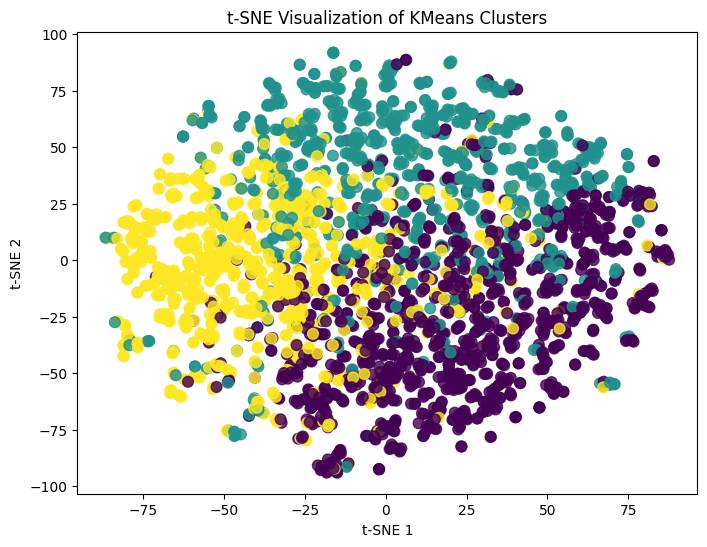

In [26]:
plot_clusters(embeddings, 3)

/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/detraviousjamaribrinkley/Documents/Developme

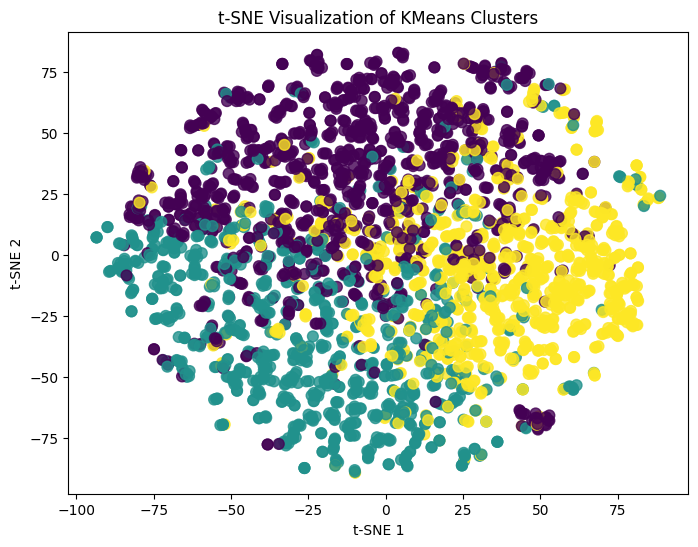


=== Cluster 0 ===
 - No Republican will be President of the USA before December 30, 2039.
 - The market capitalization of Berkshire Hathaway will be greater than Tesla on Warren Buffett's 100th birthday.
 - Driverless cars will be commercially available in Las Vegas, NV by May 27 2024.
 - Large Hadron Collider will destroy Earth.
 - World peace by October 30, 2150

=== Cluster 1 ===
 - An annual average temperature anomaly value above the 1850-1899 baseline will be published in the Berkeley Earth Global Temperature series as 2.0C or higher on or before the 2037 value (published in 2038).
 - American Social Security will remain intact through 2050.
 - by the end of the term in 2024 will be higher, unemployment rate lower and number of system crisis lower than now.
 - By 2025, there will at least be one prescription ready, effective probiotic medication to treat depression, caused by disturbances in the equilibrium of the gut microbiome.
 - In 2029, the US will consume less total energy

/var/folders/78/9z0b45fx1xqbwxh8vk97lcfh0000gn/T/ipykernel_34626/999282206.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff_labels_df["cluster"] = labels


In [36]:

import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def plot_clusters(embeddings, n_clusters):
    # Convert array-like embeddings → 2D matrix
    X = np.vstack(embeddings)

    # --------------------------
    # Run clustering
    # --------------------------
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto")
    labels = kmeans.fit_predict(X)

    # --------------------------
    # Run 2D t-SNE for visualization
    # --------------------------
    tsne = TSNE(
        n_components=2,
        learning_rate='auto',
        init='random',
        perplexity=3
    ).fit_transform(X)

    # --------------------------
    # Plot
    # --------------------------
    plt.figure(figsize=(8, 6))
    plt.scatter(tsne[:, 0], tsne[:, 1], c=labels, cmap='viridis', s=60, alpha=0.8)
    plt.title("t-SNE Visualization of KMeans Clusters")
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.show()

    return labels

# ---- Run clustering ----
embeddings = diff_labels_df["sentence embedding"].values
labels = plot_clusters(embeddings, n_clusters=3)

# -----------------------------------------
# GET SAMPLE SENTENCES FROM EACH CLUSTER
# -----------------------------------------
diff_labels_df["cluster"] = labels

for c in sorted(diff_labels_df["cluster"].unique()):
    print(f"\n=== Cluster {c} ===")
    examples = diff_labels_df[diff_labels_df["cluster"] == c]["sentence"].head(5)
    for s in examples:
        print(" -", s)

